Import the needed libraries


In [97]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Read the Data

In [112]:
data =pd.read_csv('./Iris.csv')

In [113]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [116]:
l_enc = LabelEncoder()
data['Species'] = l_enc.fit_transform(data['Species'])
print(encoder.classes_)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [117]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [54]:
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [55]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Exploratory Data Analysis

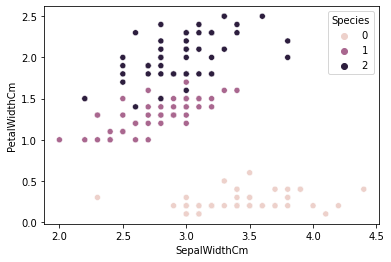

In [71]:
sns.scatterplot(x="SepalWidthCm",y="PetalWidthCm",hue="Species",data=data)

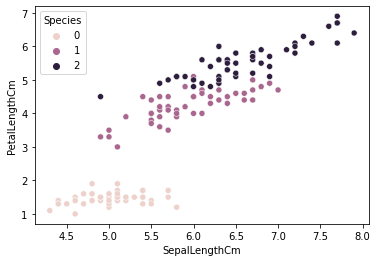

In [72]:
sns.scatterplot(x="SepalLengthCm",y="PetalLengthCm",hue="Species",data=data)

Split Training and Test dataset

In [127]:
X = data.iloc[1:,1:-1]
y = data.iloc[1:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Support Vector Machine

In [121]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [122]:
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.94

Neural Networks

In [128]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

model = Sequential()
model.add(Dense(4, activation='relu', input_dim = 4))
model.add(Dense(3,activation='sigmoid'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train = np_utils.to_categorical(y_train)

In [130]:
# fit the model
model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1608 - accuracy: 0.3030
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.1598 - accuracy: 0.3030
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1589 - accuracy: 0.3030
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1576 - accuracy: 0.3030
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1565 - accuracy: 0.3030
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1551 - accuracy: 0.3030
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1540 - accuracy: 0.3030
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1529 - accuracy: 0.3030
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1518 - accuracy: 0.3030
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.1507 - accuracy: 0.3030
Epoch 11/1000
4/4 [

In [131]:
# evaluate the model
y_test = np_utils.to_categorical(y_test)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.8400
Accuracy: 84.00
